In [2]:
from imblearn.over_sampling import SMOTE
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import *

In [ ]:
df = pd.read_csv("./data/credit_card_default.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
df.shape 

(30000, 24)

In [11]:
y = df.pop('default_payment_next_month')

In [12]:
train_X, test_X, train_y, test_y = train_test_split(df, y, test_size=0.2 , stratify=y)

In [15]:
train_y.value_counts(normalize=True)

default_payment_next_month
0    0.778792
1    0.221208
Name: proportion, dtype: float64

In [16]:
test_y.value_counts(normalize=True)

default_payment_next_month
0    0.778833
1    0.221167
Name: proportion, dtype: float64

In [17]:
train_X.isnull().sum()

limit_bal                 0
sex                     128
education               116
marriage                119
age                     128
payment_status_sep        0
payment_status_aug        0
payment_status_jul        0
payment_status_jun        0
payment_status_may        0
payment_status_apr        0
bill_statement_sep        0
bill_statement_aug        0
bill_statement_jul        0
bill_statement_jun        0
bill_statement_may        0
bill_statement_apr        0
previous_payment_sep      0
previous_payment_aug      0
previous_payment_jul      0
previous_payment_jun      0
previous_payment_may      0
previous_payment_apr      0
dtype: int64

In [20]:
import missingno

<Axes: >

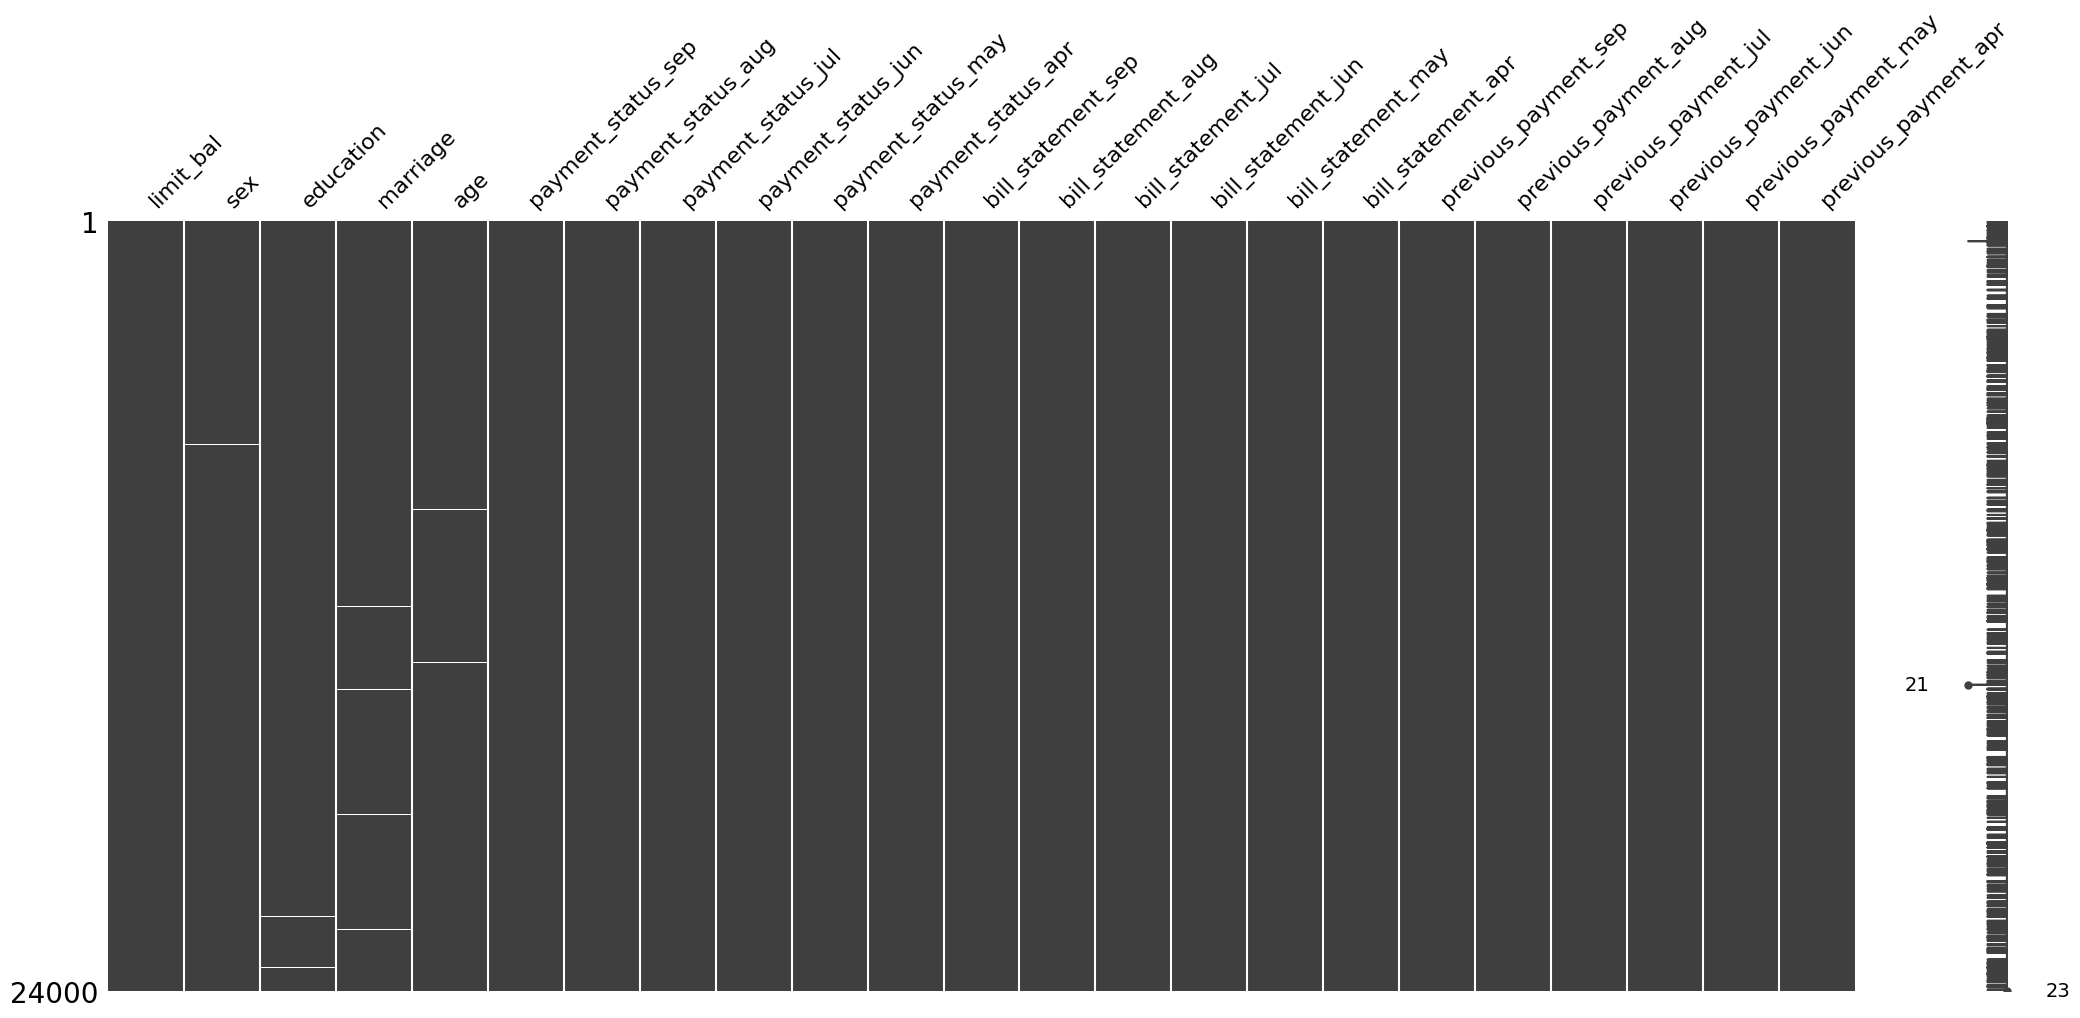

In [22]:
missingno.matrix(train_X)

In [24]:
train_X.describe().round(2)

,limit_bal,age,bill_statement_sep,bill_statement_aug,bill_statement_jul,bill_statement_jun,bill_statement_may,bill_statement_apr,previous_payment_sep,previous_payment_aug,previous_payment_jul,previous_payment_jun,previous_payment_may,previous_payment_apr
count,24000.00,23872.00,24000.00,24000.00,24000.00,24000.00,24000.00,24000.00,24000.00,24000.00,24000.00,24000.00,24000.00,24000.00
mean,167118.74,35.48,50928.77,48864.34,46706.09,42810.68,39984.13,38662.67,5641.94,5851.62,5141.02,4811.76,4847.84,5135.53
std,129565.63,9.21,73509.02,71103.12,68697.70,63902.56,60447.64,59420.51,16620.66,21345.80,16762.54,15739.86,15346.23,17366.08
min,10000.00,21.00,-154973.00,-67526.00,-61506.00,-170000.00,-81334.00,-339603.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,50000.00,28.00,3496.25,2893.50,2544.00,2217.75,1686.00,1201.50,980.00,792.00,390.00,289.75,215.50,94.75
50%,140000.00,34.00,22024.00,20850.00,19834.50,18810.50,17907.50,16809.00,2100.00,2003.50,1800.00,1500.00,1500.00,1500.00
75%,240000.00,41.00,66436.50,63188.25,59850.50,53600.50,49943.25,48961.25,5006.00,5000.00,4500.00,4005.00,4026.75,4000.00
max,800000.00,75.00,746814.00,743970.00,855086.00,706864.00,823540.00,699944.00,873552.00,1227082.00,889043.00,621000.00,426529.00,527143.00


In [25]:
train_X.describe(include='object').round(2)

,sex,education,marriage,payment_status_sep,payment_status_aug,payment_status_jul,payment_status_jun,payment_status_may,payment_status_apr
count,23872,23884,23881,24000,24000,24000,24000,24000,24000
unique,2,4,3,10,10,10,10,9,9
top,Female,University,Single,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
freq,14367,11207,12732,13977,15596,15854,16552,17137,16870


In [26]:
from sklearn.impute import SimpleImputer

In [36]:
help(SimpleImputer)

Help on class SimpleImputer in module sklearn.impute._base:

class SimpleImputer(_BaseImputer)
 |  SimpleImputer(*, missing_values=nan, strategy='mean', fill_value=None, copy=True, add_indicator=False, keep_empty_features=False)
 |
 |  Univariate imputer for completing missing values with simple strategies.
 |
 |  Replace missing values using a descriptive statistic (e.g. mean, median, or
 |  most frequent) along each column, or using a constant value.
 |
 |  Read more in the :ref:`User Guide <impute>`.
 |
 |  .. versionadded:: 0.20
 |     `SimpleImputer` replaces the previous `sklearn.preprocessing.Imputer`
 |     estimator which is now removed.
 |
 |  Parameters
 |  ----------
 |  missing_values : int, float, str, np.nan, None or pandas.NA, default=np.nan
 |      The placeholder for the missing values. All occurrences of
 |      `missing_values` will be imputed. For pandas' dataframes with
 |      nullable integer dtypes with missing values, `missing_values`
 |      can be set to eit

In [32]:
num_imputer  = SimpleImputer(strategy='median')
num_imputer.fit(train_X[['age']])

SimpleImputer(strategy='median')

In [34]:
train_X['age'] = num_imputer.transform(train_X[['age']])

In [35]:
train_X['age'].isnull().sum()

np.int64(0)

In [39]:
train_X.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age',
       'payment_status_sep', 'payment_status_aug', 'payment_status_jul',
       'payment_status_jun', 'payment_status_may', 'payment_status_apr',
       'bill_statement_sep', 'bill_statement_aug', 'bill_statement_jul',
       'bill_statement_jun', 'bill_statement_may', 'bill_statement_apr',
       'previous_payment_sep', 'previous_payment_aug', 'previous_payment_jul',
       'previous_payment_jun', 'previous_payment_may', 'previous_payment_apr'],
      dtype='object')

In [41]:
for col in ['sex', 'education', 'marriage']:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    cat_imputer.fit(train_X[[col]])
    train_X[[col]] = cat_imputer.transform(train_X[[col]])

In [42]:
train_X.isnull().sum()

limit_bal               0
sex                     0
education               0
marriage                0
age                     0
payment_status_sep      0
payment_status_aug      0
payment_status_jul      0
payment_status_jun      0
payment_status_may      0
payment_status_apr      0
bill_statement_sep      0
bill_statement_aug      0
bill_statement_jul      0
bill_statement_jun      0
bill_statement_may      0
bill_statement_apr      0
previous_payment_sep    0
previous_payment_aug    0
previous_payment_jul    0
previous_payment_jun    0
previous_payment_may    0
previous_payment_apr    0
dtype: int64

In [ ]:
pip install category_encoders

In [44]:
import category_encoders as ce

In [45]:
target_en = ce.TargetEncoder(smoothing=0)

In [ ]:
target_en.fit(train_X['sex'], train_y)

In [48]:
target_en.transform(train_X['sex']).value_counts()

sex     
0.207037    14495
0.242820     9505
Name: count, dtype: int64

In [57]:
category_list = train_X.dtypes[train_X.dtypes == 'object'].index.tolist()

In [77]:
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder(sparse_output=False, handle_unknown='error', drop='first')

In [78]:
from sklearn.compose import ColumnTransformer

In [79]:
one_hot_trans = ColumnTransformer(
    [('one_hot', one_hot, category_list)]
)

In [80]:
one_hot_trans.fit(train_X)

ColumnTransformer(transformers=[('one_hot',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['sex', 'education', 'marriage',
                                  'payment_status_sep', 'payment_status_aug',
                                  'payment_status_jul', 'payment_status_jun',
                                  'payment_status_may',
                                  'payment_status_apr'])])

In [88]:
train_X.drop(category_list, axis=1)

,limit_bal,age,bill_statement_sep,bill_statement_aug,bill_statement_jul,bill_statement_jun,bill_statement_may,bill_statement_apr,previous_payment_sep,previous_payment_aug,previous_payment_jul,previous_payment_jun,previous_payment_may,previous_payment_apr
1025,180000,38.0,153099,150227,138313,137274,147314,129870,7005,6500,5000,12042,32,1300
24290,340000,30.0,20865,2611,3255,57920,23207,22659,2000,3255,57920,22659,2000,1000
14705,180000,30.0,0,1186,0,0,0,0,1186,0,0,0,0,0
9160,360000,30.0,-28,-28,1072,1980,10780,2036,0,1100,2025,10819,2110,5600
13056,30000,29.0,26414,27189,28235,28669,29355,29913,1500,1800,1200,1300,1200,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10407,200000,51.0,102847,52556,34369,14240,23762,18198,52556,2003,1000,26068,10019,61500
17889,500000,29.0,39345,40382,40740,16316,10705,-42,2014,4135,3256,53,0,36368
3092,60000,27.0,23439,26042,29182,29906,29292,29729,3300,3900,1500,0,1074,1200
3365,500000,37.0,0,0,0,0,0,0,0,0,0,0,0,0


In [93]:
train_X_2 = train_X.drop(category_list, axis=1)

In [96]:
pd.concat([train_X_2.reset_index(drop=True),
pd.DataFrame(one_hot_trans.transform(train_X), columns=one_hot_trans.get_feature_names_out().tolist()).reset_index(drop=True)], axis=1)

,limit_bal,age,bill_statement_sep,bill_statement_aug,bill_statement_jul,bill_statement_jun,bill_statement_may,bill_statement_apr,previous_payment_sep,previous_payment_aug,...,one_hot__payment_status_may_Payment delayed 8 months,one_hot__payment_status_may_Unknown,one_hot__payment_status_apr_Payment delayed 2 months,one_hot__payment_status_apr_Payment delayed 3 months,one_hot__payment_status_apr_Payment delayed 4 months,one_hot__payment_status_apr_Payment delayed 5 months,one_hot__payment_status_apr_Payment delayed 6 months,one_hot__payment_status_apr_Payment delayed 7 months,one_hot__payment_status_apr_Payment delayed 8 months,one_hot__payment_status_apr_Unknown
0,180000,38.0,153099,150227,138313,137274,147314,129870,7005,6500,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,340000,30.0,20865,2611,3255,57920,23207,22659,2000,3255,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,180000,30.0,0,1186,0,0,0,0,1186,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,360000,30.0,-28,-28,1072,1980,10780,2036,0,1100,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,30000,29.0,26414,27189,28235,28669,29355,29913,1500,1800,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,200000,51.0,102847,52556,34369,14240,23762,18198,52556,2003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23996,500000,29.0,39345,40382,40740,16316,10705,-42,2014,4135,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23997,60000,27.0,23439,26042,29182,29906,29292,29729,3300,3900,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23998,500000,37.0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
